# Avocado Project 

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loding Dataset
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.shape

(18249, 14)

It can be seen that there are 18249 rows and 14 Columns

In [4]:
# Checking Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


**As we can see that there are no null values are present in the data and the data types are same as that of actual data contained in it**

In [5]:
# checking 1st column to see that whether it contains any information or not
df['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

In [6]:
# Taking out the month from date and adding one more column to dataset
df['month'] = pd.DatetimeIndex(df['Date']).month
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [7]:
# Upon checking I am deleting the 1st column Unnamed 
df=df.drop(['Unnamed: 0','Date'],axis=1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [8]:
#cheking for null values
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

No null values present in the dataset

In [9]:
# Encoding the Two Columns by Label Encoder for region and type
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df['type'] = le.fit_transform(df['type'])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


In [10]:
# Shuffle the database
df = df.sample(frac = 1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
7387,0.96,930918.01,482854.07,163669.16,12228.42,272166.36,160062.92,109657.89,2445.55,0,2017,33,7
10407,1.77,2184.05,1393.71,8.68,0.00,781.66,759.62,22.04,0.00,1,2015,24,5
11351,1.56,21389.70,13268.66,8105.63,0.00,15.41,15.41,0.00,0.00,1,2015,42,3
7727,1.13,153568.21,33526.51,62461.07,176.82,57403.81,56665.14,738.67,0.00,0,2017,39,2
16110,1.12,139908.49,3921.76,41022.31,1849.73,93114.69,33735.94,59378.75,0.00,1,2017,25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6406,1.29,168252.20,1391.78,100681.06,5482.22,60697.14,53182.31,6877.73,637.10,0,2017,14,1
6701,1.42,161864.64,98757.83,14132.78,46.02,48928.01,28914.04,16267.58,3746.39,0,2017,20,7
3554,1.63,132894.77,2041.86,66472.24,18506.96,45873.71,39617.39,1742.09,4514.23,0,2016,14,8
1302,1.03,2193142.82,515063.58,1060753.67,113979.43,503346.14,445274.87,57239.73,831.54,0,2015,25,12


In [11]:
# Describing the database
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
type,18249.0,0.499918,5.000137e-01,0.00,0.00,0.00,1.00,1.00


**Observation**
1. For the Numeric Columns in database the mean is more than the median and hence we can say the that columns are positivey skewed

In [12]:
# Checking the skewness of the data
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.106617
dtype: float64

The skewness data should be nearer to the zero to be a normal distribution, but We can see that our data is away from mean and tailed towards right and it is positively skewed

# EDA

1.4059784097758887


<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

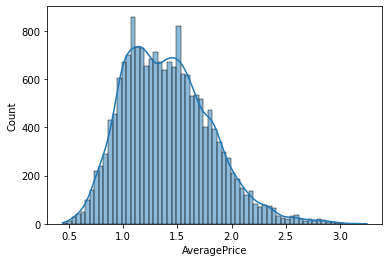

In [13]:
# histogram for the Average Price
print(df['AveragePrice'].mean())
sns.histplot(x='AveragePrice', data=df, kde=True)

The average price is moreover normally distributed

0    9126
1    9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

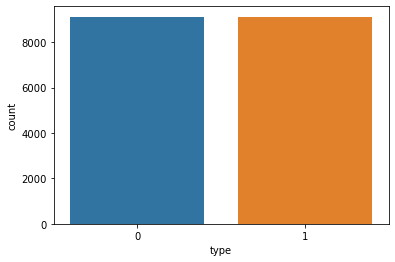

In [14]:
#Count Plot for Type
print(df['type'].value_counts())
sns.countplot(x='type',data=df)

As we can see that the data for Convetional and Organic type of Avocado is same hence there is no need for balancing the data

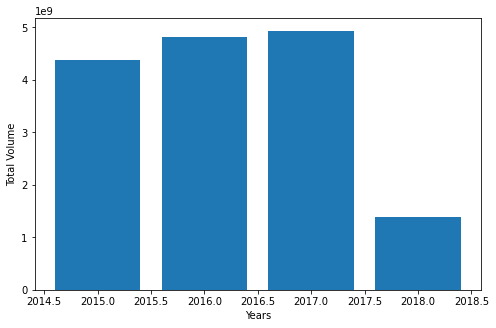

In [15]:
#Bar Plot showing Total volume sold from 2015 to 2018
plt.figure(figsize=(8,5))
df1=df.groupby(["year"])['Total Volume'].sum()
plt.bar(data=df1,x=df1.index, height=df1.values)
plt.xlabel("Years")
plt.ylabel("Total Volume")
plt.show()

As we can see that the total volume of avocados were saled in 2017 , but the data for 2018 is not taken for entire year.

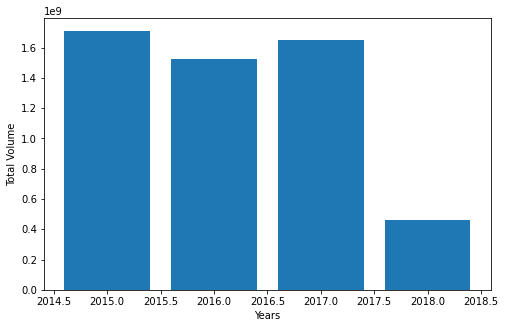

In [16]:
#Bar Plot showing PLU4046 from 2015 to 2018
plt.figure(figsize=(8,5))
df1=df.groupby(["year"])['4046'].sum()
plt.bar(data=df1,x=df1.index, height=df1.values)
plt.xlabel("Years")
plt.ylabel("Total Volume")
plt.show()

Plot is showing the decreasing trend for the data

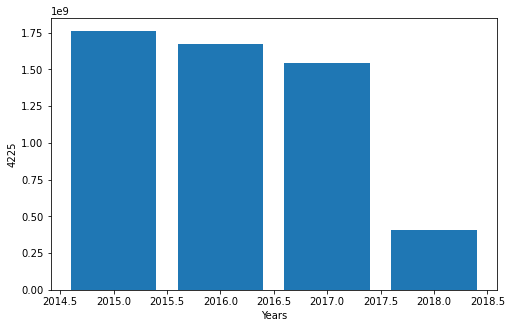

In [17]:
#Bar Plot showing PLU4225 from 2015 to 2018
plt.figure(figsize=(8,5))
df1=df.groupby(["year"])['4225'].sum()
plt.bar(data=df1,x=df1.index, height=df1.values)
plt.xlabel("Years")
plt.ylabel("4225")
plt.show()

Plot is showing the decreasing trend for the data

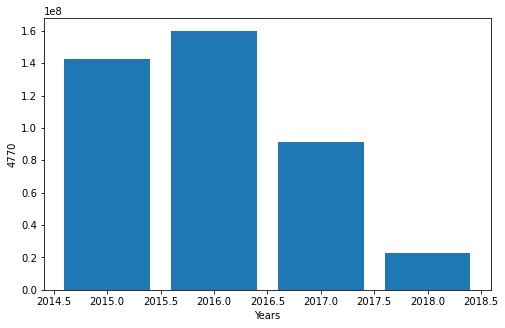

In [18]:
#Bar Plot showing PLU4770 from 2015 to 2018
plt.figure(figsize=(8,5))
df1=df.groupby(["year"])['4770'].sum()
plt.bar(data=df1,x=df1.index, height=df1.values)
plt.xlabel("Years")
plt.ylabel("4770")
plt.show()

Plot is showing the decreasing trend for the data

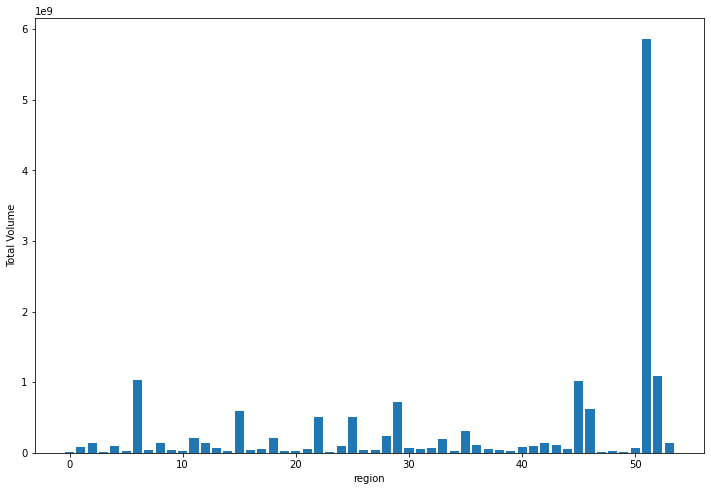

In [19]:
# Plot showing the Total Volume Consumed in regions of USA
plt.figure(figsize=(12,8))
df1=df.groupby(df["region"])['Total Volume'].sum()
plt.bar(data=df1,x=df1.index, height=df1.values)
plt.xlabel("region")
plt.ylabel("Total Volume")
plt.show()

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

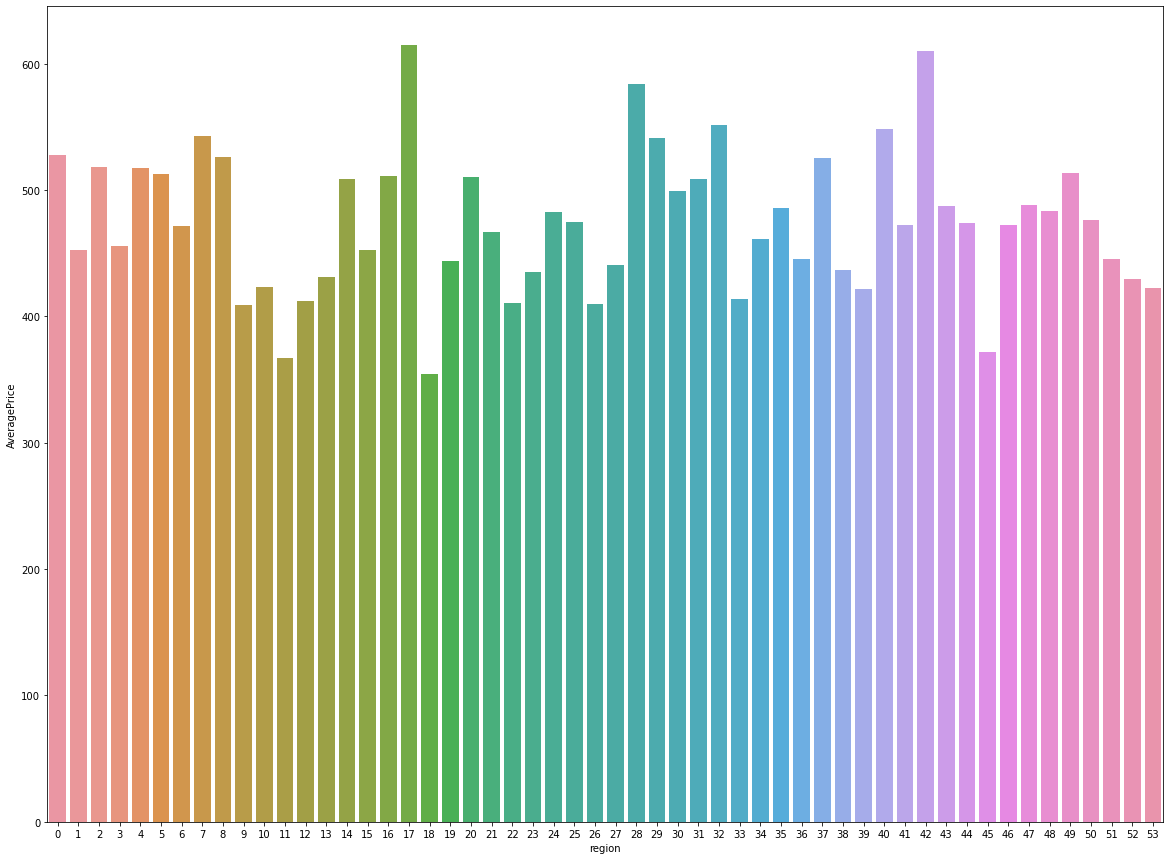

In [20]:
# Plot showing Average Price in diffrent regions of the USA
df1=df.groupby(['region']).sum()
plt.figure(figsize=(20,15))
sns.barplot(x = df1.index,y=df1["AveragePrice"],data = df1)

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

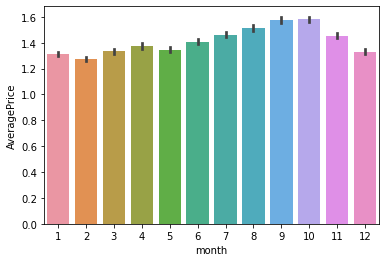

In [21]:
# The average price distributed over the months
sns.barplot(x='month',y='AveragePrice', data=df)

It is seen that the average price is higher in sept, oct, nov and then settling down

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

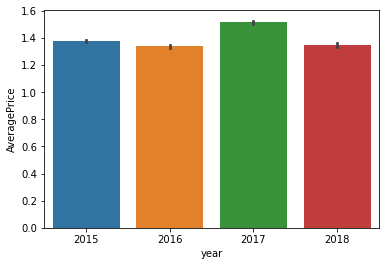

In [22]:
# Average Price vs Year Plot
sns.barplot(x='year',y='AveragePrice', data=df)

We can see that the in 2017 the average price is little bit high otherwise it is more or less constant only

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

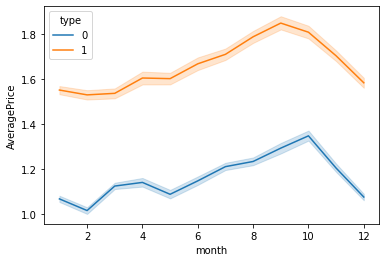

In [23]:
#Line plot for both types of avocado over the months
sns.lineplot(x='month',y='AveragePrice', data=df, hue='type')

It can be concluded that the the Average Price is higher in the month of september, october and november

It can be concluded that the the Average Price is higher in the month of september, october and november

In [25]:
# Checking the skewness for the data
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.106617
dtype: float64

<AxesSubplot:>

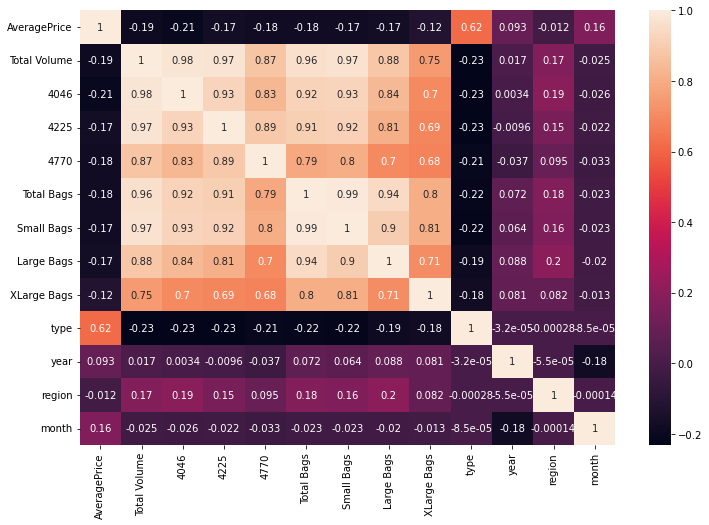

In [26]:
#Checking the correlation of the database
corr_mat=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat,annot=True)

In [27]:
#importing the VIF in jupyter
from statsmodels.stats.outliers_influence import variance_inflation_factor
new_df=pd.DataFrame(df)
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = new_df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
    return VIF_Scores
df1 = new_df
vif_scores(df1)

,Independent Features,VIF Scores
0,AveragePrice,2.288679e+01
1,Total Volume,5.213172e+09
2,4046,6.947984e+08
3,4225,6.333882e+08
4,4770,4.974087e+06
5,Total Bags,2.502000e+14
6,Small Bags,1.429714e+14
7,Large Bags,1.521486e+13
8,XLarge Bags,7.856943e+10
9,type,3.399608e+00


array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

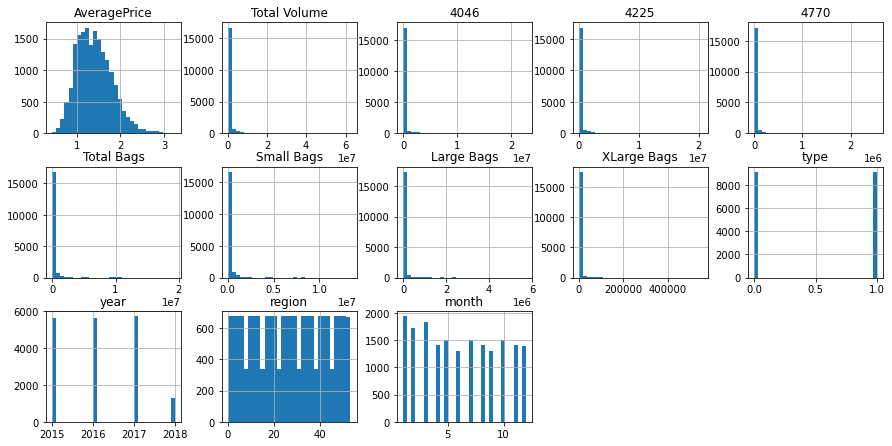

In [28]:
## Plotting Histogram for the database
df.hist(grid=True,layout=(4,5),figsize=(15,10),bins=30)

The Numerical columns are positively skewed as shown in dataset

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
month            AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

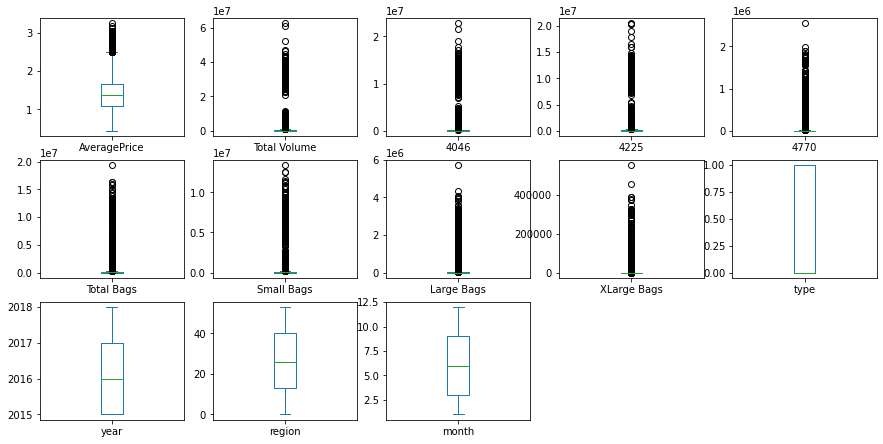

In [29]:
# Checking for outliers in data base by box plot method
df.plot(kind='box', subplots=True,layout=(4,5),figsize=(15,10))

<AxesSubplot:>

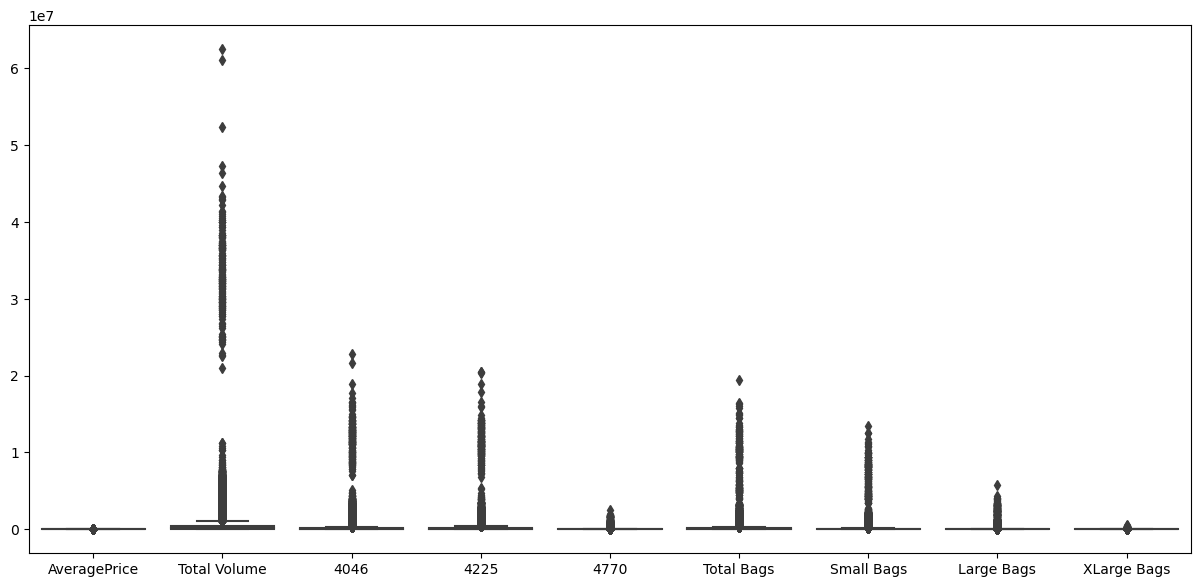

In [30]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])

As we can see that the Total volume, 4046, 4225, 4770, total bags , small bags , large bags, Xlarge bags are having the outliers and to be removed for further processing

**Dealing with Outliers**

In [31]:
# Importing Zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(18249, 13)

In [32]:
# Setting threshold at 3 and detecting the outliers
threshold=3
print(np.where(z>3))

(array([   34,    34,    34, ..., 18235, 18235, 18235], dtype=int64), array([1, 2, 3, ..., 5, 6, 7], dtype=int64))


In [33]:
# Removing the outlier 
df=df[(z<3).all(axis=1)]
df.shape

(17651, 13)

In [34]:
#calculating loss
loss=(18249-17651)/18249*100
loss

3.276891884486821

**As the loss of data is only 3.27% we can re,ove the outliers and Proceed Further**

**Separating the data for train test Split in X and Y**

In [35]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']
print(x.shape)
print(y.shape)

(17651, 12)
(17651,)


# Regression Model for Average Price Prediction

In [36]:
# Removing Skewness Using Power Transform
from sklearn.preprocessing import power_transform
x=power_transform(x, method='yeo-johnson')
x

array([[ 1.17159497e+00,  1.40390935e+00,  8.31337028e-01, ...,
         2.59459121e-13,  5.03956598e-01,  3.27730435e-01],
       [-1.59453803e+00, -5.73359442e-01, -2.17773084e+00, ...,
        -3.42503803e-13, -3.65222743e-02, -2.20987773e-01],
       [-5.76389894e-01,  1.14168646e-01, -3.78577952e-01, ...,
        -3.42503803e-13,  1.00486356e+00, -8.53140915e-01],
       ...,
       [ 2.59676780e-01, -4.62795810e-01,  4.35039192e-01, ...,
        -4.12447854e-14, -7.08611013e-01,  5.80434458e-01],
       [ 1.58000766e+00,  1.42949495e+00,  1.75861399e+00, ...,
        -3.42503803e-13,  2.59747631e-02,  1.49138300e+00],
       [ 1.96297968e-01,  4.16539047e-01,  2.81014578e-01, ...,
        -4.12447854e-14,  8.41529970e-01, -1.21890654e+00]])

In [37]:
#checking for skewness is removed or not
skew_df=pd.DataFrame(x)
skew_df.skew()

0    -0.008642
1    -0.039282
2    -0.044675
3     0.024168
4    -0.022204
5    -0.024405
6    -0.110913
7     0.853758
8    -0.037741
9     0.000000
10   -0.257799
11   -0.146554
dtype: float64

In [38]:
#importing the StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
x

array([[ 1.17159497,  1.40390935,  0.83133703, ...,  0.91744776,
         0.5039566 ,  0.32773043],
       [-1.59453803, -0.57335944, -2.17773084, ..., -1.2106377 ,
        -0.03652227, -0.22098777],
       [-0.57638989,  0.11416865, -0.37857795, ..., -1.2106377 ,
         1.00486356, -0.85314091],
       ...,
       [ 0.25967678, -0.46279581,  0.43503919, ..., -0.14561374,
        -0.70861101,  0.58043446],
       [ 1.58000766,  1.42949495,  1.75861399, ..., -1.2106377 ,
         0.02597476,  1.491383  ],
       [ 0.19629797,  0.41653905,  0.28101458, ..., -0.14561374,
         0.84152997, -1.21890654]])

In [39]:
# importing Linear Regression and metrics for it
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [40]:
# Finding the best Random State
maxr2=0
maxrs=0
lr=LinearRegression()
for i in range(0,200):
    print("Random State is ", i)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(xtrain,ytrain)
    predtrain=lr.predict(xtrain)
    predtest=lr.predict(xtest)
    print('training accuracy is ', r2_score(ytrain,predtrain))
    score=r2_score(ytest,predtest)
    print('testing accuracy is ', score)
    print("\n")
    
    if score>maxr2:
        maxr2=score
        maxrs=i
        
        
print("maximum r2 score is ", maxr2 , "at random state ", maxrs)

Random State is  0
training accuracy is  0.568142906920444
testing accuracy is  0.5572409239964813


Random State is  1
training accuracy is  0.5674028189030371
testing accuracy is  0.5600676809830003


Random State is  2
training accuracy is  0.5646257946490089
testing accuracy is  0.5715094306581417


Random State is  3
training accuracy is  0.5689781862627437
testing accuracy is  0.553763832705523


Random State is  4
training accuracy is  0.5666628193262429
testing accuracy is  0.5637863013830828


Random State is  5
training accuracy is  0.5646222630698763
testing accuracy is  0.5718522765195881


Random State is  6
training accuracy is  0.564958629043494
testing accuracy is  0.5700405326062841


Random State is  7
training accuracy is  0.5657703205456484
testing accuracy is  0.5672138751069448


Random State is  8
training accuracy is  0.5656450441734302
testing accuracy is  0.5677559879970683


Random State is  9
training accuracy is  0.5701510867448081
testing accuracy is  0.54

**We have got the best random state as 166 where the testing accuracy is 0.58 and training is 0.56**

In [41]:
# Spliting data on the best Random state we have got
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)

In [42]:
#running that same model again for other metrics too

lr.fit(x_train,y_train)
predtrainlr=lr.predict(x_train)
predtestlr=lr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainlr))
print('testing accuracy is ', r2_score(y_test,predtestlr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestlr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestlr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestlr)))

training accuracy is  0.5599151344113714
testing accuracy is  0.5896819549207568
Mean Squared Error is  0.06256892606043683
Mean Absolute Error is  0.1973126955017653
Root Mean Squared Error is  0.2501378141354018


In [43]:
from sklearn.model_selection import cross_val_score
#Cross validation of the lr model
for j in range(2,20):
    cv_score=cross_val_score(lr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())
    print('training accuracy is ', r2_score(y_train,predtrainlr))
    print('testing accuracy is ', r2_score(y_test,predtestlr))

At fold  2 Mean CV score is  0.5645705224714689
training accuracy is  0.5599151344113714
testing accuracy is  0.5896819549207568
At fold  3 Mean CV score is  0.5649112820730701
training accuracy is  0.5599151344113714
testing accuracy is  0.5896819549207568
At fold  4 Mean CV score is  0.5650117733819677
training accuracy is  0.5599151344113714
testing accuracy is  0.5896819549207568
At fold  5 Mean CV score is  0.5653187546354049
training accuracy is  0.5599151344113714
testing accuracy is  0.5896819549207568
At fold  6 Mean CV score is  0.5652305630861526
training accuracy is  0.5599151344113714
testing accuracy is  0.5896819549207568
At fold  7 Mean CV score is  0.5651391644412647
training accuracy is  0.5599151344113714
testing accuracy is  0.5896819549207568
At fold  8 Mean CV score is  0.5651866669667136
training accuracy is  0.5599151344113714
testing accuracy is  0.5896819549207568
At fold  9 Mean CV score is  0.5651422664132292
training accuracy is  0.5599151344113714
testing 

In [44]:
# modelling using the Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predtraindtr=dtr.predict(x_train)
predtestdtr=dtr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtraindtr))
print('testing accuracy is ', r2_score(y_test,predtestdtr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestdtr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestdtr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestdtr)))

training accuracy is  1.0
testing accuracy is  0.747828776854266
Mean Squared Error is  0.03845329934862646
Mean Absolute Error is  0.12558482016425943
Root Mean Squared Error is  0.1960951283143629


In [45]:
#Cross validation of the dtr model
dtr=DecisionTreeRegressor()
for j in range(2,10):
    cvdtr=cross_val_score(dtr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cvdtr.mean())


At fold  2 Mean CV score is  0.7063171756920104
At fold  3 Mean CV score is  0.7375422032323907
At fold  4 Mean CV score is  0.744130898833542
At fold  5 Mean CV score is  0.7523637363755658
At fold  6 Mean CV score is  0.7626809670590587
At fold  7 Mean CV score is  0.7520313164117305
At fold  8 Mean CV score is  0.7633345637038145
At fold  9 Mean CV score is  0.7668000404593891


In [46]:
# Modelling with randomForestRegressor

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predtrainrfr=rfr.predict(x_train)
predtestrfr=rfr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainrfr))
print('testing accuracy is ', r2_score(y_test,predtestrfr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestrfr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestrfr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestrfr)))

training accuracy is  0.9840794327426534
testing accuracy is  0.8990623199685674
Mean Squared Error is  0.01539187056074766
Mean Absolute Error is  0.08635431888983292
Root Mean Squared Error is  0.12406397769194594


In [47]:
#Cross validation of the rfr model
for j in range(2,10):
    cv_score=cross_val_score(rfr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.8604587684799165
At fold  3 Mean CV score is  0.8796742697675503
At fold  4 Mean CV score is  0.8856888213770704
At fold  5 Mean CV score is  0.890936096965963
At fold  6 Mean CV score is  0.8916804109753108
At fold  7 Mean CV score is  0.8926561382585486
At fold  8 Mean CV score is  0.8937990067131124
At fold  9 Mean CV score is  0.8944126059571933


In [48]:
# modelling with ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
predtrainetr=etr.predict(x_train)
predtestetr=etr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainetr))
print('testing accuracy is ', r2_score(y_test,predtestetr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestetr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestetr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestetr)))

training accuracy is  1.0
testing accuracy is  0.917782948382987
Mean Squared Error is  0.012537183497592747
Mean Absolute Error is  0.075843981874823
Root Mean Squared Error is  0.11196956505047587


In [49]:
#Cross validation of the etr model
for j in range(2,10):
    cv_score=cross_val_score(etr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.8888538623361446
At fold  3 Mean CV score is  0.9038257937146428
At fold  4 Mean CV score is  0.9105138662282752
At fold  5 Mean CV score is  0.9140286318800405
At fold  6 Mean CV score is  0.9148793265506359
At fold  7 Mean CV score is  0.9151061896054314
At fold  8 Mean CV score is  0.9155299533869417
At fold  9 Mean CV score is  0.9168694990377393


In [50]:
# Modelling with SVR

from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
predtrainsvr=svr.predict(x_train)
predtestsvr=svr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainsvr))
print('testing accuracy is ', r2_score(y_test,predtestsvr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestsvr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestsvr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestsvr)))

training accuracy is  0.8054496999166335
testing accuracy is  0.8015700995605748
Mean Squared Error is  0.030258346952243994
Mean Absolute Error is  0.12863694331444062
Root Mean Squared Error is  0.17394926545474113


In [51]:
#Cross validation of the svr model
for j in range(2,10):
    cv_score=cross_val_score(svr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.7774784348043797
At fold  3 Mean CV score is  0.7862372846112001
At fold  4 Mean CV score is  0.7903839414895063
At fold  5 Mean CV score is  0.7925377950205279
At fold  6 Mean CV score is  0.793972366937224
At fold  7 Mean CV score is  0.7947465799833245
At fold  8 Mean CV score is  0.7955007062526429
At fold  9 Mean CV score is  0.795608734473761


In [52]:
# Modeling for gradient boosting regresssor
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predtraingbr=gbr.predict(x_train)
predtestgbr=gbr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtraingbr))
print('testing accuracy is ', r2_score(y_test,predtestgbr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestgbr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestgbr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestgbr)))

training accuracy is  0.7550977178577425
testing accuracy is  0.7524805302956779
Mean Squared Error is  0.03774395882456818
Mean Absolute Error is  0.14793243856162946
Root Mean Squared Error is  0.1942780451429553


In [53]:
#Cross validation of the gbr model
for j in range(2,10):
    cv_score=cross_val_score(gbr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.7428489530621003
At fold  3 Mean CV score is  0.7409377352795371
At fold  4 Mean CV score is  0.7435823809858493
At fold  5 Mean CV score is  0.744540485328374
At fold  6 Mean CV score is  0.7434378347465603
At fold  7 Mean CV score is  0.7436038487903877
At fold  8 Mean CV score is  0.7444998454497433
At fold  9 Mean CV score is  0.7434575842117268


In [54]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [55]:
# Doing Lasso Regularization
#HyperParameter Tunning to find out the best parameters
parameters={'alpha':[.00001,0.0001,0.001,0.01,0.1,1,10,100],
            'random_state':list(range(0,10)),
            'max_iter':[10,100,1000,10000],
            'tol': [0.001,0.0001,0.00001,0.000001]}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1e-05, 'max_iter': 100, 'random_state': 0, 'tol': 0.001}


In [56]:
ls=Lasso(alpha=1e-05, max_iter=100, random_state=0, tol=0.001)
ls.fit(x_train,y_train)
predtrainls=ls.predict(x_train)
predtestls=ls.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainls))
print('testing accuracy is ', r2_score(y_test,predtestls))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestls))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestls))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestls)))

training accuracy is  0.559914047808763
testing accuracy is  0.5896239833682981
Mean Squared Error is  0.06257776607569547
Mean Absolute Error is  0.19732313358140344
Root Mean Squared Error is  0.2501554838009662


In [57]:
#Cross validation of the ls model
for j in range(2,10):
    cv_score=cross_val_score(ls, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.5645727788280098
At fold  3 Mean CV score is  0.5649111706762637
At fold  4 Mean CV score is  0.5650122905307473
At fold  5 Mean CV score is  0.5653212627753763
At fold  6 Mean CV score is  0.5652316953018088
At fold  7 Mean CV score is  0.565139493150262
At fold  8 Mean CV score is  0.5651870625039558
At fold  9 Mean CV score is  0.5651430156675379


In [58]:
# Doing Ridge Regularization
#HyperParameter Tunning to find out the best parameters
parameters={'alpha':[.00001,0.0001,0.001,0.01,0.1,1,10,100],
            'random_state':list(range(0,10)),
            'max_iter':[10,100,1000,10000],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

rg=Ridge()
clf=GridSearchCV(rg,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1e-05, 'max_iter': 10, 'random_state': 4, 'solver': 'sag'}


In [59]:
rg=Ridge(alpha=1e-05, max_iter=10, random_state=4, solver='sag')
rg.fit(x_train,y_train)
predtrainrg=rg.predict(x_train)
predtestrg=rg.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainrg))
print('testing accuracy is ', r2_score(y_test,predtestrg))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestrg))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestrg))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestrg)))

training accuracy is  0.5590772193199331
testing accuracy is  0.5888679878732148
Mean Squared Error is  0.06269304695793097
Mean Absolute Error is  0.19775648976615331
Root Mean Squared Error is  0.25038579623838686


In [60]:
#Cross validation of the ls model
for j in range(2,10):
    cv_score=cross_val_score(rg, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.5640991823255466
At fold  3 Mean CV score is  0.5637004353941376
At fold  4 Mean CV score is  0.5643692589538987
At fold  5 Mean CV score is  0.5652604595904684
At fold  6 Mean CV score is  0.5634123918685691
At fold  7 Mean CV score is  0.5646043142224072
At fold  8 Mean CV score is  0.5630352339544454
At fold  9 Mean CV score is  0.564451462023557


**Observations**
1. All models have shown higher testing accuracy at fold 9 for cross validation hence comparing models on the basis of fold 9
2. It is observed that Extra Tree Regressor model is Showing 91% testing accuracy, 1 training accuracy and 91.63% Cross Validation score
3. For which we can say that Extra Tree Classifier model is considerably fitting the data, hence saving that model


And Going Further for Hyper Parameter tunning of ExtraTreeRegressor

In [ ]:
# modelling with ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

parameter = {
    'n_estimators': [10,100],
    'criterion': ['mse', 'mae'],    
}

model = ExtraTreesRegressor ()

gcv = GridSearchCV(model,parameter,cv=9,n_jobs=-1).fit(x_train,y_train.values.ravel())

gcv.best_params_

# Important observation Made 

1. I am avoiding the Hyper Parameter tunning as it getting more time (2hrs) than usual, I may be do not have that much CPU power.
2. I have tried solving on google colab also but there too it is taking too much time
3. hence **I am saving the model ExtraTreeRegressor Model as this has given me the testing accuracy of 91.01 with cross val score 91.63 it can be considered as the model is predicting quite a good results** 

**Saving Model**

In [62]:
#Importing Job lib for saving the model
import joblib
joblib.dump(ExtraTreesRegressor(), "Avocado Average Price Prediction.pkl")

['Avocado Average Price Prediction.pkl']

In [63]:
a=np.array(y_test)
predicted=np.array(predtestetr)
df_con=pd.DataFrame({'Original':a,'Predicted':predtestetr}, index=range(len(a)))
df_con

,Original,Predicted
0,1.13,1.3481
1,1.38,1.4399
2,1.03,1.0461
3,1.26,1.4674
4,0.87,1.2145
...,...,...
3526,1.65,1.5785
3527,1.52,1.7757
3528,1.47,1.5667
3529,1.64,1.5510


# Classification model for predicting Type of Avocado

Starting from dividing the dataset in to X and Y

In [71]:
X=df.drop(['type'],axis=1)
Y=df['type']
print(X.shape)
print(Y.shape)

(17651, 12)
(17651,)


In [72]:
# Removing Skewness Using Power Transform
from sklearn.preprocessing import power_transform
X=power_transform(X, method='yeo-johnson')
X

array([[-1.01268387e+00,  9.09222213e-01, -2.61921173e-01, ...,
        -6.67521594e-13, -1.53707792e+00,  1.05319424e+00],
       [ 2.10986908e+00, -5.10943030e-01, -6.33007506e-01, ...,
        -8.02691247e-14,  1.00486356e+00, -8.53140919e-01],
       [-4.20671351e-01,  6.12153482e-01, -3.38445807e-01, ...,
         1.09096066e-12,  2.59747629e-02, -1.64028838e+00],
       ...,
       [ 7.57000758e-01, -1.34505651e+00, -5.61571851e-01, ...,
        -8.02691247e-14, -2.94039416e-01,  3.27730428e-01],
       [ 4.70898275e-01, -1.37354377e+00, -9.22198605e-01, ...,
        -8.02691247e-14,  1.48968166e-01,  5.80434454e-01],
       [ 2.21839590e-01,  1.94836736e-01, -3.70013929e-01, ...,
         1.09096066e-12,  1.21771090e+00, -1.21890654e+00]])

In [73]:
#checking for skewness is removed or not
skew_df=pd.DataFrame(X)
skew_df.skew()

0     0.000464
1    -0.008642
2    -0.039282
3    -0.044675
4     0.024168
5    -0.022204
6    -0.024405
7    -0.110913
8     0.853758
9     0.000000
10   -0.257799
11   -0.146554
dtype: float64

In [74]:
#importing the StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[-1.01268387,  0.90922221, -0.26192117, ..., -1.2106638 ,
        -1.53707792,  1.05319424],
       [ 2.10986908, -0.51094303, -0.63300751, ..., -0.14558763,
         1.00486356, -0.85314092],
       [-0.42067135,  0.61215348, -0.33844581, ...,  1.97862469,
         0.02597476, -1.64028838],
       ...,
       [ 0.75700076, -1.34505651, -0.56157185, ..., -0.14558763,
        -0.29403942,  0.32773043],
       [ 0.47089828, -1.37354377, -0.9221986 , ..., -0.14558763,
         0.14896817,  0.58043445],
       [ 0.22183959,  0.19483674, -0.37001393, ...,  1.97862469,
         1.2177109 , -1.21890654]])

In [75]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lg=LogisticRegression()

In [78]:
# Finding the random state
maxaccu=0
maxrs=0
for i in range(1,100):
    print("At Random State ", i)
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.20, random_state=i)
    lg.fit(Xtrain,Ytrain)
    predlg=lg.predict(Xtest)
    trainlg=lg.predict(Xtrain)
    acc=accuracy_score(Ytest,predlg)
    accu=accuracy_score(Ytrain,trainlg)
    print('testing accuracy', acc, 'randon state',i)
    print('Training Accuracy', accu, 'random state', i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', i)

At Random State  1
testing accuracy 0.9597847635230813 randon state 1
Training Accuracy 0.9609065155807366 random state 1
max accuracy 0.9597847635230813 max_random_state 1
At Random State  2
testing accuracy 0.9612007929764939 randon state 2
Training Accuracy 0.9603399433427762 random state 2
max accuracy 0.9612007929764939 max_random_state 2
At Random State  3
testing accuracy 0.9617672047578589 randon state 3
Training Accuracy 0.9606232294617564 random state 3
max accuracy 0.9617672047578589 max_random_state 3
At Random State  4
testing accuracy 0.9600679694137638 randon state 4
Training Accuracy 0.9604815864022663 random state 4
At Random State  5
testing accuracy 0.9595015576323987 randon state 5
Training Accuracy 0.9603399433427762 random state 5
At Random State  6
testing accuracy 0.9629000283205891 randon state 6
Training Accuracy 0.9598441926345609 random state 6
max accuracy 0.9629000283205891 max_random_state 6
At Random State  7
testing accuracy 0.9575191163976211 randon st

In [79]:
# Checking for the Max. Accuracy at Random State
print('max accuracy', maxaccu , 'max_random_state', i)

max accuracy 0.9665817048994619 max_random_state 99


In [80]:
# train test split for the data with suggested random state
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=99)

In [81]:
# Checking score again for the the lr model 
lg=LogisticRegression()
lg.fit(X_train,Y_train)
predlg=lg.predict(X_test)
predtrain=lg.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predlg))
print(confusion_matrix(Y_test,predlg))
print(classification_report(Y_test,predlg))

Training accuracy is  0.9599150141643059
0.9597847635230813
[[1686   76]
 [  66 1703]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1762
           1       0.96      0.96      0.96      1769

    accuracy                           0.96      3531
   macro avg       0.96      0.96      0.96      3531
weighted avg       0.96      0.96      0.96      3531



In [82]:
#AUC ROC Curve
# Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

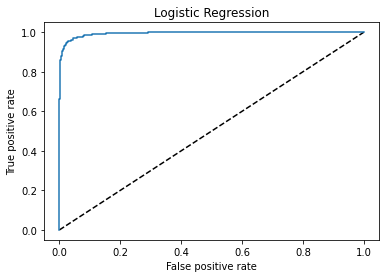

0.9597789910612138

In [83]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(Y_test,lg.predict(X_test))

auc_score

In [84]:
# using DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)
predtrain=dtc.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,preddtc))
print(confusion_matrix(Y_test,preddtc))
print(classification_report(Y_test,preddtc))

Training accuracy is  1.0
0.9932030586236194
[[1750   12]
 [  12 1757]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1762
           1       0.99      0.99      0.99      1769

    accuracy                           0.99      3531
   macro avg       0.99      0.99      0.99      3531
weighted avg       0.99      0.99      0.99      3531



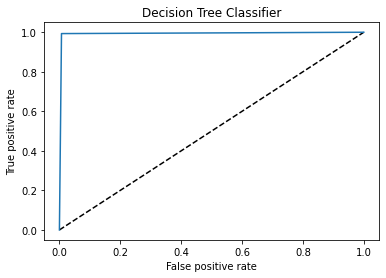

0.9932030319110369

In [85]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=dtc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

auc_score

In [86]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predrf=rf.predict(X_test)
predtrain=rf.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predrf))
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))

Training accuracy is  1.0
0.9991503823279524
[[1762    0]
 [   3 1766]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1762
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



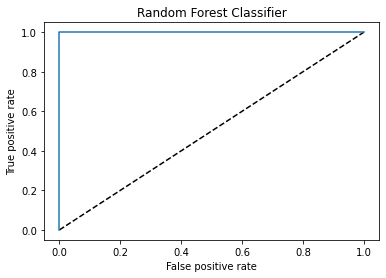

0.999152063312606

In [87]:
#AUC ROC curve for Random Forest Classifier Classifier
Y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,rf.predict(X_test))

auc_score

In [88]:
# Using SVC
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)
predtrain=svc.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predsvc))
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

Training accuracy is  0.9946175637393768
0.9937694704049844
[[1752   10]
 [  12 1757]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1762
           1       0.99      0.99      0.99      1769

    accuracy                           0.99      3531
   macro avg       0.99      0.99      0.99      3531
weighted avg       0.99      0.99      0.99      3531



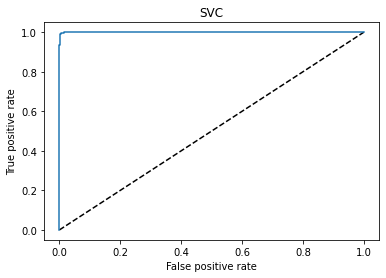

0.9937705688009346

In [90]:
#AUC ROC curve for  SVC
Y_pred_prob=svc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC')
plt.show()

auc_score=roc_auc_score(Y_test,svc.predict(X_test))

auc_score

In [92]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
predtrain=knn.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predknn))
print(confusion_matrix(Y_test,predknn))
print(classification_report(Y_test,predknn))

Training accuracy is  0.9989376770538244
0.9977343528745398
[[1758    4]
 [   4 1765]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1762
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



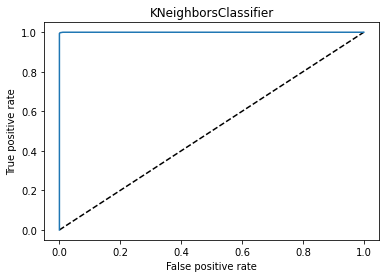

0.9977343439703457

In [93]:
#AUC ROC curve for  KNeighborsClassifier
Y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,knn.predict(X_test))

auc_score

In [94]:
# Using GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
xgb=GradientBoostingClassifier()
xgb.fit(X_train,Y_train)
predxgb=xgb.predict(X_test)
predtrain=knn.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predxgb))
print(confusion_matrix(Y_test,predxgb))
print(classification_report(Y_test,predxgb))

Training accuracy is  0.9989376770538244
0.9980175587652224
[[1761    1]
 [   6 1763]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1762
           1       1.00      1.00      1.00      1769

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



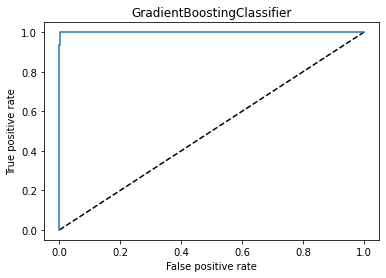

0.998020358180263

In [95]:
#AUC ROC curve for  GradientBoostingClassifier
Y_pred_prob=xgb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,xgb.predict(X_test))

auc_score

In [96]:
# using AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
predada=ada.predict(X_test)
predtrain=ada.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predada))
print(confusion_matrix(Y_test,predada))
print(classification_report(Y_test,predada))

Training accuracy is  0.9946883852691218
0.9960351175304446
[[1757    5]
 [   9 1760]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1762
           1       1.00      0.99      1.00      1769

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



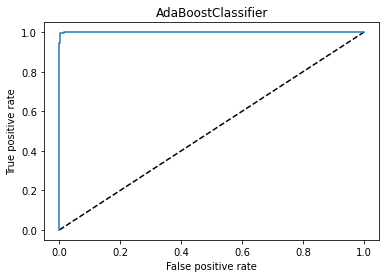

0.9960373477130734

In [97]:
#AUC ROC curve for  AdaBoostClassifier
Y_pred_prob=ada.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,ada.predict(X_test))

auc_score

In [98]:
# Using Naive bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predgnb = gnb.predict(X_test)
predtrain=gnb.predict(X_train)
print("Training accuracy is ",accuracy_score(Y_train,predtrain))
print(accuracy_score(Y_test,predgnb))
print(confusion_matrix(Y_test,predgnb))
print(classification_report(Y_test,predgnb))

Training accuracy is  0.9325070821529745
0.9427924100821297
[[1688   74]
 [ 128 1641]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1762
           1       0.96      0.93      0.94      1769

    accuracy                           0.94      3531
   macro avg       0.94      0.94      0.94      3531
weighted avg       0.94      0.94      0.94      3531



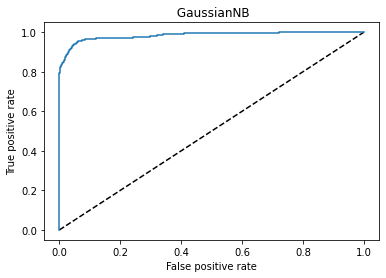

0.9428225030783021

In [99]:
#AUC ROC curve for  GaussianNB
Y_pred_prob=gnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=' GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(' GaussianNB')
plt.show()

auc_score=roc_auc_score(Y_test,gnb.predict(X_test))

auc_score

In [100]:
from sklearn.model_selection import cross_val_score

# validation accuracy

model=[lg,dtc,rf,knn,xgb,ada,gnb,svc]

for i in model:
    for j in range(2,10):
        print('taking cv =', j)
        cr_score=cross_val_score(i, X, Y, cv=j)
        print('Cross validation score for ' , i ,' is', cr_score)
        print('Mean of Cross Val. score is ', cr_score.mean())


taking cv = 2
Cross validation score for  LinearRegression()  is [0.76015717 0.76306295]
Mean of Cross Val. score is  0.7616100595203916
taking cv = 3
Cross validation score for  LinearRegression()  is [0.76335528 0.7597299  0.7613697 ]
Mean of Cross Val. score is  0.7614849591639999
taking cv = 4
Cross validation score for  LinearRegression()  is [0.76338749 0.75689802 0.76960963 0.75597845]
Mean of Cross Val. score is  0.7614683992002574
taking cv = 5
Cross validation score for  LinearRegression()  is [0.76826289 0.75324706 0.75889492 0.76948529 0.75702184]
Mean of Cross Val. score is  0.7613824008547064
taking cv = 6
Cross validation score for  LinearRegression()  is [0.76566092 0.76062408 0.75355667 0.76569285 0.76972678 0.7531535 ]
Mean of Cross Val. score is  0.7614024676587668
taking cv = 7
Cross validation score for  LinearRegression()  is [0.76487977 0.76506487 0.75272209 0.75169923 0.77978701 0.76080003
 0.75490186]
Mean of Cross Val. score is  0.761407838449501
taking cv = 8

**As we can see that the Cross validation score at fold  for Random Forest Classifier is matching to its testing accuracy as well as training accuracy, which is slightly more than the other models** 

**Hence selecting Random Forest Classifier for this Problem** 

**I do not find need to do the hyperparameter tunning on the database as the random Forest Classifier is giving accuracy of 99.91% and hence I am going to save this model**

In [101]:
#Importing Job lib for saving the model
import joblib
joblib.dump(RandomForestClassifier(), "Avocado Type Prediction.pkl")

['Avocado Type Prediction.pkl']

In [103]:
# Conclusion Step 
a=np.array(Y_test)
predicted=np.array(predrf)
df_con=pd.DataFrame({'Original':a,'Predicted':predrf}, index=range(len(a)))
df_con

,Original,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
3526,1,1
3527,0,0
3528,0,0
3529,1,1
